In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Part A: Stock Simulation Function 
generate sequences of simulated daily stock prices, or runs. 

In [2]:
def simulate_stock(start, rate, vol, days):
    mean_daily_yield = rate / 252
    std_dev_daily_yield = vol / (252 ** 0.5)
    daily_yields = np.random.normal(mean_daily_yield, std_dev_daily_yield, days)
    cumulative_yields = np.cumsum(daily_yields)
    daily_multipliers = np.exp(cumulative_yields)
    simulated_prices = np.round(start * daily_multipliers, 2)
    simulated_prices = np.concatenate(([start], simulated_prices))
    return simulated_prices

Test my Function simulate_stock

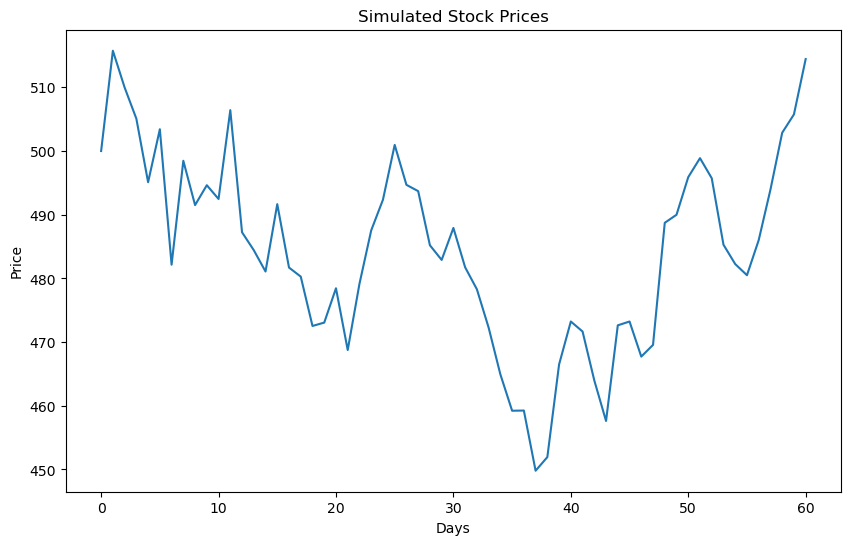

Final simulated price: 514.44


In [3]:
np.random.seed(1)
start_price = 500.0
annual_return = 0.08
annual_volatility = 0.3
number_days = 60
simulated_prices = simulate_stock(start_price, annual_return, annual_volatility, number_days)
plt.figure(figsize=(10, 6))
plt.plot(simulated_prices)
plt.title('Simulated Stock Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()
final_price = simulated_prices[-1]
print("Final simulated price:",final_price)


## Part B: Annual Yield Function 
function that takes a simulated run as its input, and calculates the annual yield
during for that particular run. 


In [4]:
def find_yield(run):
    days_in_run = len(run) - 1
    initial_price = run[0]
    final_price = run[-1]
    annual_yield = math.log(final_price / initial_price) * (252 / days_in_run)
    annual_yield = round(annual_yield, 4)
    return annual_yield

Test my Function find_yield

In [5]:
np.random.seed(1)
simulated_prices = simulate_stock(500.0, 0.08, 0.3, 60)
annual_yield = find_yield(simulated_prices)
print("Annual yield is:",annual_yield)

Annual yield is: 0.1196


explore the potential variability in our simulated runs by creating
and plotting 25 simulated runs.

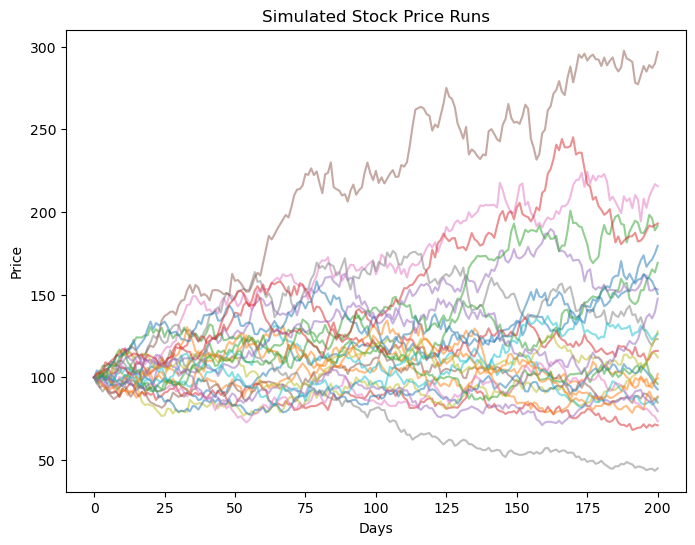

Annual Yields for Each Run:
Run  1 0.7375
Run  2 0.0266
Run  3 0.663
Run  4 -0.4319
Run  5 0.5371
Run  6 -0.2086
Run  7 0.9679
Run  8 0.2618
Run  9 0.3093
Run  10 -0.1628
Run  11 -0.0956
Run  12 -0.1546
Run  13 -0.0517
Run  14 0.1869
Run  15 -0.2887
Run  16 1.3704
Run  17 -0.3891
Run  18 -1.0067
Run  19 0.1443
Run  20 0.2954
Run  21 0.5144
Run  22 -0.0072
Run  23 0.8206
Run  24 0.8291
Run  25 0.4901


In [6]:
current_price = 100.0
expected_annual_yield = 0.06
annual_volatility = 0.4
number_days = 200
number_runs = 25
annual_yields = []
np.random.seed(1)
plt.figure(figsize=(8, 6))
for _ in range(number_runs):
    simulated_prices = simulate_stock(current_price, expected_annual_yield, annual_volatility, number_days)
    annual_yield = find_yield(simulated_prices)
    annual_yields.append(annual_yield)
    plt.plot(simulated_prices, alpha=0.5)
plt.title('Simulated Stock Price Runs')
plt.xlabel('Days')
plt.ylabel('Price')
plt.show()
print("Annual Yields for Each Run:")
for i, yield_value in enumerate(annual_yields):
    print("Run ",i + 1,yield_value)


Display the yields for the 25 simulated runs

In [7]:
print("Annual Yields for Each Run:")
for i, yield_value in enumerate(annual_yields):
    print("Run ",i + 1,yield_value)

Annual Yields for Each Run:
Run  1 0.7375
Run  2 0.0266
Run  3 0.663
Run  4 -0.4319
Run  5 0.5371
Run  6 -0.2086
Run  7 0.9679
Run  8 0.2618
Run  9 0.3093
Run  10 -0.1628
Run  11 -0.0956
Run  12 -0.1546
Run  13 -0.0517
Run  14 0.1869
Run  15 -0.2887
Run  16 1.3704
Run  17 -0.3891
Run  18 -1.0067
Run  19 0.1443
Run  20 0.2954
Run  21 0.5144
Run  22 -0.0072
Run  23 0.8206
Run  24 0.8291
Run  25 0.4901


## Part C: Finding Seeds that Generate Specific Outcomes 
working with seeds. Through trial and error,we will try to find
seeds that result in specific outcomes. 

In the cell below, Stock A has the highest simulated final price."

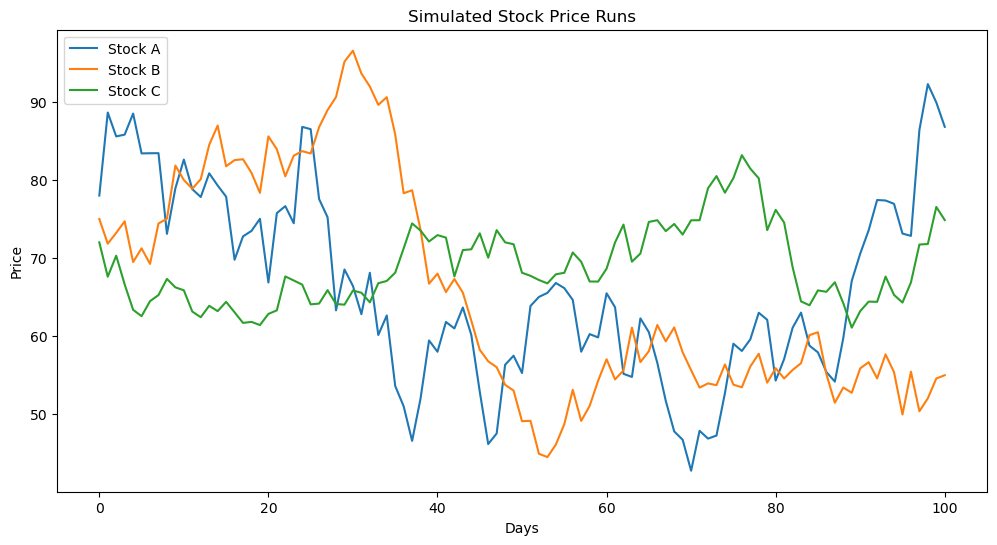

Final Prices After 100 Days:
Stock A 86.82
Stock C 74.86
Stock B 54.96


In [8]:
np.random.seed(7)
stock_params = [
    {"name": "Stock A", "current_price": 78, "expected_annual_return": 0.04, "volatility": 1.2},
    {"name": "Stock B", "current_price": 75, "expected_annual_return": 0.08, "volatility": 0.8},
    {"name": "Stock C", "current_price": 72, "expected_annual_return": 0.16, "volatility": 0.6}
]
num_days = 100
plt.figure(figsize=(12, 6))
final_prices = []
for stock in stock_params:
    simulated_prices = simulate_stock(stock["current_price"], stock["expected_annual_return"], stock["volatility"], num_days)
    plt.plot(simulated_prices, label=stock["name"])
    final_prices.append((stock["name"], simulated_prices[-1]))
plt.title('Simulated Stock Price Runs')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()
final_prices.sort(key=lambda x: x[1],reverse=True)
print("Final Prices After 100 Days:")
for stock_name, final_price in final_prices:
    print(stock_name,final_price)

In the cell below, Stock B has the highest simulated final price

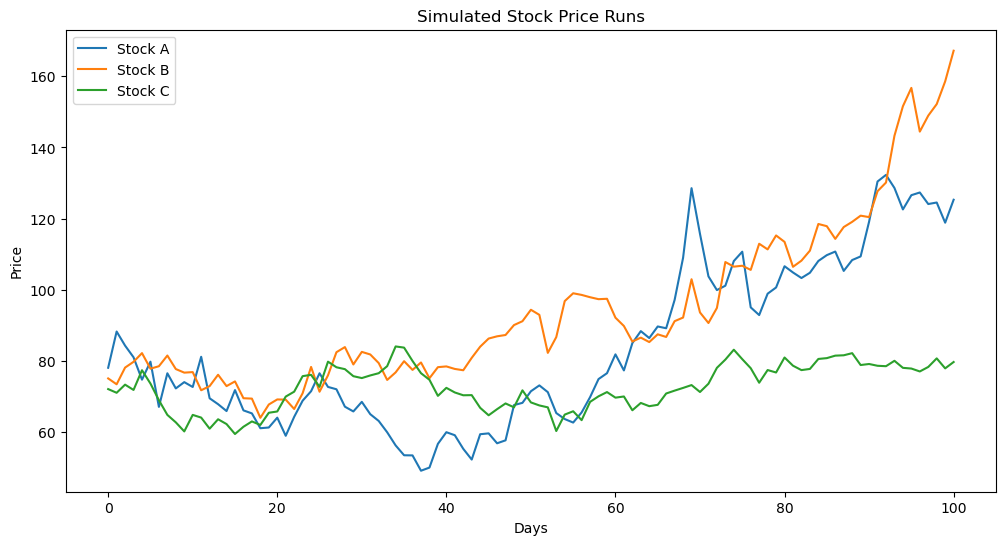

Final Prices After 100 Days:
Stock B 167.21
Stock A 125.28
Stock C 79.62


In [9]:
np.random.seed(1)
stock_params = [
    {"name": "Stock A", "current_price": 78, "expected_annual_return": 0.04, "volatility": 1.2},
    {"name": "Stock B", "current_price": 75, "expected_annual_return": 0.08, "volatility": 0.8},
    {"name": "Stock C", "current_price": 72, "expected_annual_return": 0.16, "volatility": 0.6}
]
num_days = 100
plt.figure(figsize=(12, 6))
final_prices = []
for stock in stock_params:
    simulated_prices = simulate_stock(stock["current_price"], stock["expected_annual_return"], stock["volatility"], num_days)
    plt.plot(simulated_prices,  label=stock["name"])
    final_prices.append((stock["name"], simulated_prices[-1]))
plt.title('Simulated Stock Price Runs')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()
final_prices.sort(key=lambda x: x[1],reverse=True)
print("Final Prices After 100 Days:")
for stock_name, final_price in final_prices:
    print(stock_name,final_price)

In the cell below, Stock C has the highest simulated final price

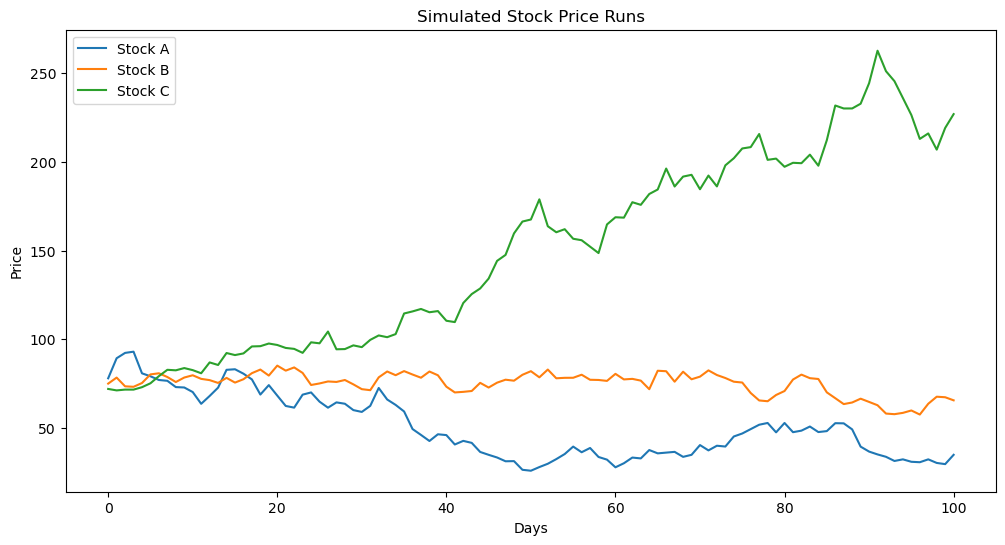

Final Prices After 100 Days:
Stock C 226.96
Stock B 65.58
Stock A 34.86


In [10]:
np.random.seed(3)
stock_params = [
    {"name": "Stock A", "current_price": 78, "expected_annual_return": 0.04, "volatility": 1.2},
    {"name": "Stock B", "current_price": 75, "expected_annual_return": 0.08, "volatility": 0.8},
    {"name": "Stock C", "current_price": 72, "expected_annual_return": 0.16, "volatility": 0.6}
]
num_days = 100
plt.figure(figsize=(12, 6))
final_prices = []
for stock in stock_params:
    simulated_prices = simulate_stock(stock["current_price"], stock["expected_annual_return"], stock["volatility"], num_days)
    plt.plot(simulated_prices, label=stock["name"])
    final_prices.append((stock["name"], simulated_prices[-1]))
plt.title('Simulated Stock Price Runs')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()
final_prices.sort(key=lambda x: x[1],reverse=True)
print("Final Prices After 100 Days:")
for stock_name, final_price in final_prices:
    print(stock_name,final_price)

## Part D: Monte Carlo Simulation 

The process of performing several simulations to estimate
probabilities relating to the outcome of a certain event is called Monte Carlo Simulation. 

In [11]:
def monte_carlo(start, rate, vol, days, num_runs):
    final_prices = []
    annual_yields = []
    for _ in range(num_runs):
        simulated_prices = simulate_stock(start, rate, vol, days)
        final_price = simulated_prices[-1]
        final_prices.append(final_price)
        annual_yield = find_yield(simulated_prices)
        annual_yields.append(annual_yield)
    final_prices = np.array(final_prices)
    annual_yields = np.array(annual_yields)
    return final_prices, annual_yields

Test The Function Monte Carlo Simulation with seed (1)

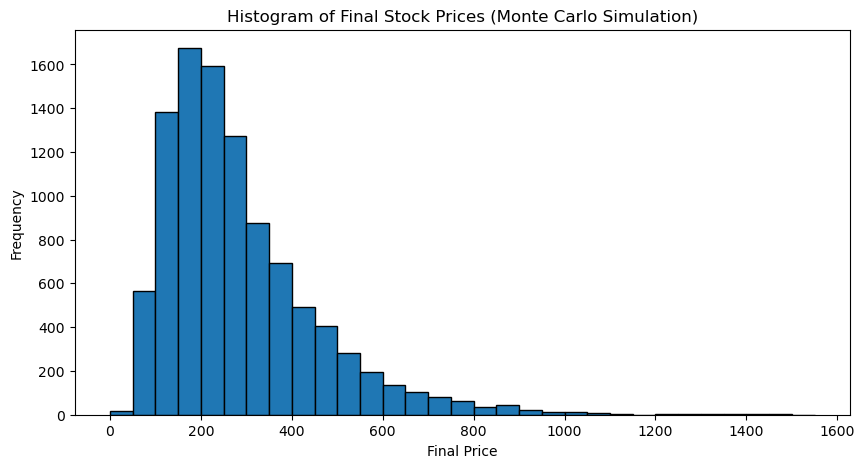

In [12]:
np.random.seed(1)
start_price = 200
expected_annual_return = 0.10
volatility = 0.4
num_days = 500
num_runs = 10000
final_prices,_= monte_carlo(start_price, expected_annual_return, volatility, num_days, num_runs)
plt.figure(figsize=[10, 5])
plt.hist(final_prices, bins=np.arange(0, 1600, 50), edgecolor='black')
plt.title('Histogram of Final Stock Prices (Monte Carlo Simulation)')
plt.xlabel('Final Price')
plt.ylabel('Frequency')
plt.show()


 display the 10th, 25th, 50th, 75th, and 90th percentiles of the
simulated final prices. 



In [13]:
percentiles = [10, 25, 50, 75, 90]
percentile_values = np.percentile(final_prices, percentiles)
for p, value in zip(percentiles, percentile_values):
    print(p,"the percentile:",round(value,2))

10 the percentile: 118.05
25 the percentile: 165.57
50 the percentile: 242.95
75 the percentile: 357.56
90 the percentile: 505.91


## Part E: Effects of Volatility
we will explore the effect of volatility on simulated stock prices. We will do this by performing two Monte Carlo
simulations. The two simulations will use different volatilities, but will otherwise use the same parameters.

In [14]:
def monte_carlo(start_price, rate, vol, days):
    mean_yield = rate / 252
    std_dev_yield = vol / (252 ** 0.5)
    daily_yields = np.random.normal(mean_yield, std_dev_yield, days)
    acc_yields = np.cumsum(daily_yields)
    daily_multipliers = np.exp(acc_yields)
    simulated_prices = np.round(start_price * daily_multipliers, 2)
    return simulated_prices

def monte_carlo_annual_yield(start_price, rate, vol, days, num_runs):
    annual_yields = []
    for _ in range(num_runs):
        simulation_prices = monte_carlo(start_price, rate, vol, days)
        annual_yield = find_yield(simulation_prices)
        annual_yields.append(annual_yield)
    average_yield = np.mean(annual_yields)
    return average_yield

np.random.seed(1)
current_price = 100
annual_yield = 0.12
days = 150
number_runs = 10000
vol_A = 0.3
vol_B = 0.7
average_A = monte_carlo_annual_yield(current_price,annual_yield, vol_A, days, number_runs)
average_B = monte_carlo_annual_yield(current_price,annual_yield, vol_B, days, number_runs)
print("Average Annual Yield for A over",number_runs,"runs: ", round(average_A,4))
print("Average Annual Yield for B over",number_runs,"runs: ",round(average_B,4))


Average Annual Yield for A over 10000 runs:  0.1216
Average Annual Yield for B over 10000 runs:  0.1138


inspect the results of the two Monte Carlo simulations by plotting
histograms of the final prices.

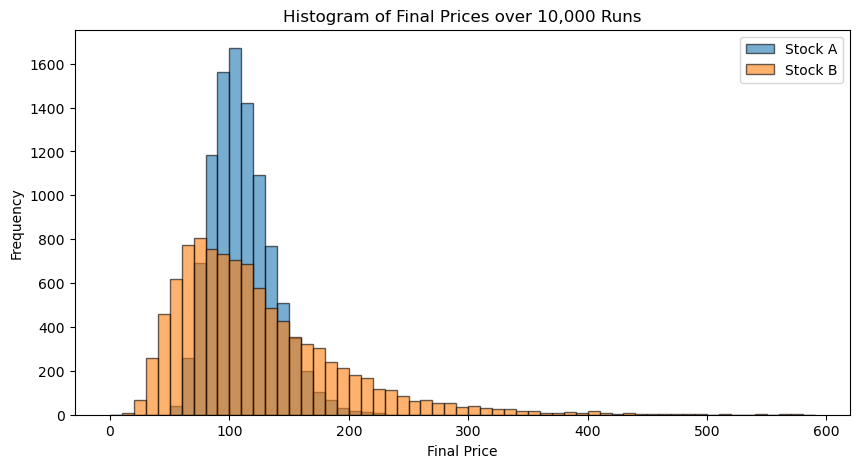

In [15]:
final_prices_A = np.zeros(number_runs)
final_prices_B = np.zeros(number_runs)
for i in range(number_runs):
    simulation_prices_A = monte_carlo(current_price, annual_yield, vol_A, days)
    final_prices_A[i] = simulation_prices_A[-1]   
    simulation_prices_B = monte_carlo(current_price, annual_yield, vol_B, days)
    final_prices_B[i] = simulation_prices_B[-1]
plt.figure(figsize=(10, 5))
plt.hist(final_prices_A, bins=np.arange(0, 600, 10), edgecolor='black', alpha=0.6, label='Stock A')
plt.hist(final_prices_B, bins=np.arange(0, 600, 10), edgecolor='black', alpha=0.6, label='Stock B')
plt.title('Histogram of Final Prices over 10,000 Runs')
plt.xlabel('Final Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()    

## Part F: Comparing Two Stocks 
we will use Monte Carlo simulation to estimate probabilities relating to the performance of two stocks with
different parameters

In [16]:
np.random.seed(1)
current_price = 120
annual_yield_A = 0.08
vol_A = 0.2
annual_yield_B = 0.05
vol_B = 0.5
days = 252
number_runs = 10000
final_prices_A = np.array([monte_carlo(current_price, annual_yield_A, vol_A, days) for i in range(number_runs)])
final_prices_B = np.array([monte_carlo(current_price, annual_yield_B, vol_B, days) for i in range(number_runs)])
prop_A_above_B = np.mean(final_prices_A[:, -1] > final_prices_B[:, -1])
prop_A_above_150 = np.mean(final_prices_A[:, -1] > 150)
prop_B_above_150 = np.mean(final_prices_B[:, -1] > 150)
prop_A_below_100 = np.mean(final_prices_A[:, -1] < 100)
prop_B_below_100 = np.mean(final_prices_B[:, -1] < 100)
print("Proportions of runs in which...")
print("-------------------------------")
print("A ends above B:\t\t", round(prop_A_above_B,4))
print("A ends above 150:\t", round(prop_A_above_150,4))
print("B ends above 150:\t", round(prop_B_above_150,4))
print("A ends below 100:\t", round(prop_A_below_100,4))
print("B ends below 100:\t", round(prop_B_below_100,4))

Proportions of runs in which...
-------------------------------
A ends above B:		 0.5206
A ends above 150:	 0.2338
B ends above 150:	 0.3619
A ends below 100:	 0.095
B ends below 100:	 0.3195


## Part G: Expected Call Payoff 
we use Monte Carlo simulation for a stock with a current price of 200, an expected annual yield of 11%, and a volatility of
0.4. Use 10,000 runs in the simulation

In [17]:
np.random.seed(1)
current_price = 200
annual_yield = 0.11  
volatility = 0.4
strike_price = 225
number_runs = 10000
call_payoffs = np.zeros(number_runs)
for i in range(number_runs):
    mean_yield = annual_yield / 252
    std_dev_yield = volatility / (252 ** 0.5)
    days = 252
    daily_yields = np.random.normal(mean_yield, std_dev_yield, days)
    acc_yields = np.cumsum(daily_yields)
    daily_multipliers = np.exp(acc_yields)
    simulated_prices = np.round(current_price * daily_multipliers, 2)
    final_price = simulated_prices[-1]
    call_payoff = max(final_price - strike_price, 0)
    call_payoffs[i] = call_payoff
average_call_payoff = np.mean(call_payoffs)
print("Average Call Payoff over 10,000 runs:", average_call_payoff)


Average Call Payoff over 10,000 runs: 45.898432
